### Predicting the optimum number of clusters using K-means Clustering. 

In [135]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#Reading the text file
data = pd.read_csv("Iris.csv")

### Data Exploration Part

In [137]:
#checking the first five rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
#Checking the number of rows and columns in the dataset respectively
data.shape

(150, 6)

In [139]:
#Checking the columns(Features and target value) in the dataset.
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [140]:
# Checking if there are any null values present in the dataset.Apparently,We see there are no null values present.
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [141]:
#checking out the statistical data of numerical columns in the dataset.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [142]:
#Checking the count of different/unique values present in the "Species"(target) Column in original dataset.
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [143]:
#Checking the datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Visualization

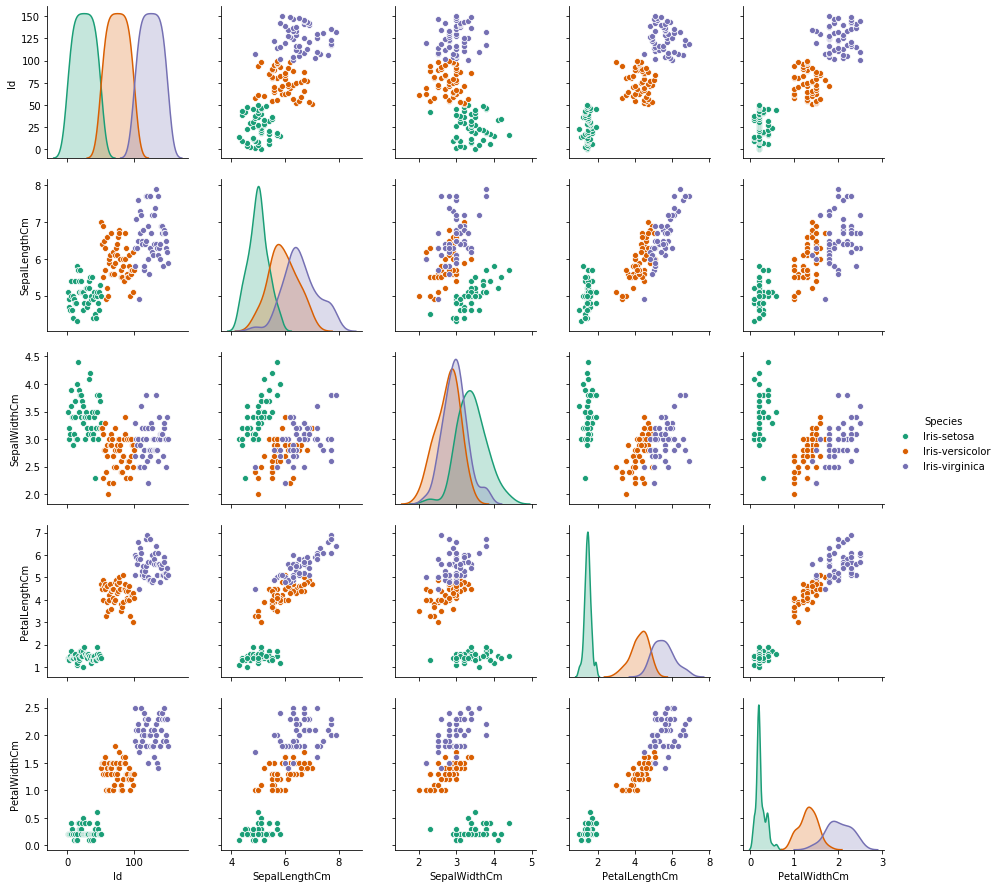

In [144]:
# Plotting the pairplot for every feature to know the relationship between the two features setting hue as species. 
# It is done to get to know which species are the more separated from each other?
sns.pairplot(data,hue = "Species",palette="Dark2")

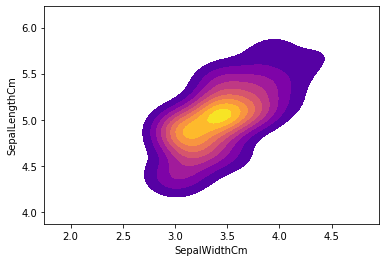

In [145]:
# Plotting kde plot of'SepalWidthCm' Vs 'SepalLengthCm' for Iris-Setosa
setosa = data[data['Species']=='Iris-setosa']
sns.kdeplot( setosa['SepalWidthCm'], setosa['SepalLengthCm'],
                 cmap="plasma", shade=True, shade_lowest=False)

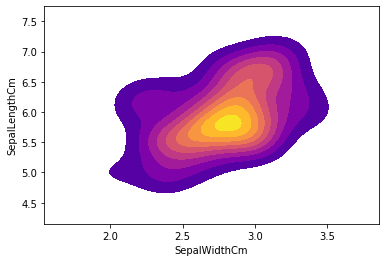

In [146]:
# Plotting kde plot of'SepalWidthCm' Vs 'SepalLengthCm' for Iris-versicolor
versicolor = data[data['Species']=='Iris-versicolor']
sns.kdeplot(versicolor['SepalWidthCm'], versicolor['SepalLengthCm'],
                 cmap="plasma", shade=True, shade_lowest=False)

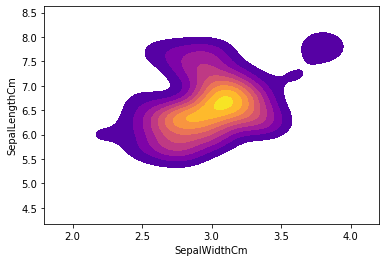

In [147]:
# Plotting kde plot of'SepalWidthCm' Vs 'SepalLengthCm' for Iris-virginica.
virginica = data[data['Species']=='Iris-virginica']
sns.kdeplot(virginica['SepalWidthCm'], virginica['SepalLengthCm'],
                 cmap="plasma", shade=True, shade_lowest=False)

### Feature Engineering

In [149]:
# This is the function which is used to map the values of the species column 
#from object to integer which is further used to classify all the three species.
def converter(cluster):
    if cluster=='Iris-setosa':
        return 0
    elif cluster=="Iris-versicolor":
        return 1
    else:
        return 2;


In [150]:
# We have used apply method on the column species of our original dataset which will map the values in species col according 
# to the values which are defined in the converter function.
# We will define a new Feature to our original dataset consisting of the mapped values for species column and
# drop the "species" column from the original dataset.Basically, it is a substitute function for get_dummies method. 
data['Cluster'] = data['Species'].apply(converter)
dataf = data.drop(["Species"],axis =1)
dataf.head()
#Setting the varibale x and the target variable y from the new dataset.
x = dataf.drop(["Cluster","Id"],axis =1)
y = dataf["Cluster"]

### Normalization

In [151]:
# To normalize all the feature columns, I have used StandardScaler which will bring all the Feature-values on a same level. 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x = np.array(x)

### Finding the optimal value of k using elbow method.

In [152]:
#For each k (number of clusters) value, we will initialise k-means 
#and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

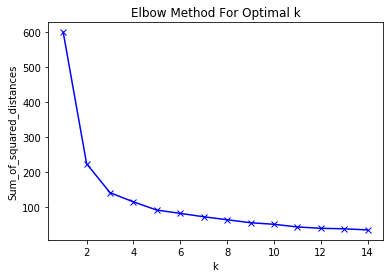

In [153]:
#Below is a plot of sum of squared distances for k in the range specified above.
#If the plot looks like an arm, then the elbow on the arm is optimal k.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### BUILDING OUR MODEL

In [154]:
# In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3. 
# Creating an instance of a K Means model with 3 clusters.
km =  KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=42,n_jobs=-1 )

In [155]:
# Fitting our data
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [156]:
# Create cluster center vectors
km.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [157]:
#Getting all the default parameters of KMeans
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'auto',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [158]:
#Checking normalized values of x
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### PREDICTED VALUES

In [159]:
#Predicting the values from the model.
y_predict= km.fit_predict(x)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


### Comparsion of the predicted values with actual values

In [160]:
# Getting the dataframe for the comparsion of the predicted values and actual values.
df = pd.DataFrame({"Actual_values": dataf["Cluster"],"Predicted_value": y_predict })
df.head()

,Actual_values,Predicted_value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [161]:
# Value count of unique value present in the predicted col of dataframe(df)
df["Predicted_value"].value_counts()

2    53
0    50
1    47
Name: Predicted_value, dtype: int64

### Visualization of results

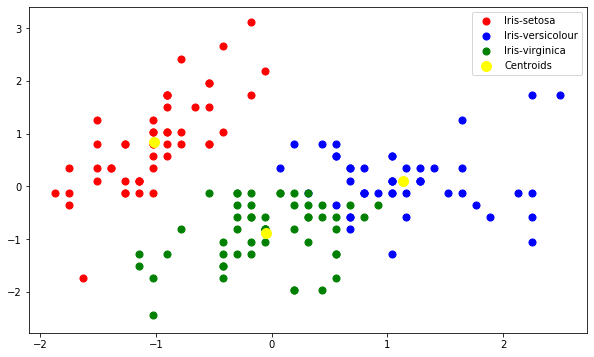

In [162]:
#Visualising the clusters
plt.figure(figsize=(10,6))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

### Evaluation

In [163]:
#for evaluation we are importing classification report which will give brief report of the model performance and confusion matrix which will tell 
#about true positives and true negatives and false positives and false negatives.
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
#printing the results
print(confusion_matrix(dataf['Cluster'],y_predict))
print(classification_report(dataf['Cluster'],y_predict))

[[50  0  0]
 [ 0 11 39]
 [ 0 36 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



### Predicting the Species if any new value of it's Features are given.

In [134]:
l=[]
l = list(map(float,input("Enter the 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' respectively : ").split()))
if km.predict([l])==0:
    print("The species with these feature's length belong to {} ".format("Iris-setosa"))
if km.predict([l])== 1:
    print("The species with these feature's length belong to {} ".format("Iris-versicolor"))
if km.predict([l])==2:
    print("The species with these feature's length belong to {} ".format("Iris-virginica"))

Enter the 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' respectively : 6.7	3.0	5.2	2.3
The species with these feature's length belong to Iris-versicolor 
